<a href="https://colab.research.google.com/github/ivansirait/Analisis_kebiasaan_saat_belajar_vs_Prestasi_Akademik-Siswa/blob/Try-before-Main/DasiDalis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
from google.colab import files

# uploaded = files.upload()

# Ambil nama file
# filename = list(uploaded.keys())[0]

# Membaca file Excel
# df = pd.read_csv(filename)
df = pd.read_csv("tes.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 22 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Timestamp                                                      1252 non-null   object 
 1   Nama Lengkap                                                   1249 non-null   object 
 2   Jenis Kelamin                                                  1252 non-null   object 
 3   Jenis Sekolah Menengah atas yang anda tempuh                   1251 non-null   object 
 4   Asal Sekolah                                                   1248 non-null   object 
 5   Tingkat Kelas                                                  1249 non-null   object 
 6   Gaya belajar yang biasanya digunakan                           1247 non-null   object 
 7   Teknik belajar yang biasanya digunakan                      

In [51]:
print("Missing values awal:")
print(df.isnull().sum())
print("Nama nama duplikat ada : ",df["Nama Lengkap"].duplicated().sum())
df = df.drop_duplicates(subset="Nama Lengkap", keep="first")
print("Jumlah nama duplikat di akhir:",df["Nama Lengkap"].duplicated().sum())
df.info()

Missing values awal:
Timestamp                                                          0
Nama Lengkap                                                       3
Jenis Kelamin                                                      0
Jenis Sekolah Menengah atas yang anda tempuh                       1
Asal Sekolah                                                       4
Tingkat Kelas                                                      3
Gaya belajar yang biasanya digunakan                               5
Teknik belajar yang biasanya digunakan                             5
Apakah kamu belajar sendiri atau dengan bantuan orang lain?        1
Lokasi Belajar                                                     4
Jam Belajar                                                        2
Total Waktu untuk mengerjakan Pekerjaan Rumah(PR)/Hari             1
Total Waktu untuk Belajar Mandiri /Hari                            2
Catatan singkat tentang Belajar                                  247
Mood Saat Bel

In [52]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()

typeint = [
    "Mood Saat Belajar",
    "Pikiran atau Stres Akademik",
    "Jumlah prestasi di dalam sekolah",
    "Jumlah prestasi di luar sekolah"
]

for col in typeint:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

perilaku = ["Mood Saat Belajar", "Pikiran atau Stres Akademik"]
for col in perilaku:
    if col in df.columns:
        df[col] = df[col].fillna(3).astype("int64")

prestasi = [
    "Jumlah prestasi di dalam sekolah",
    "Jumlah prestasi di luar sekolah"
]

for col in prestasi:
    if col in df.columns:
        df[col] = df[col].fillna(0).astype("int64")

if "Rata rata nilai Siswa(nilai tarakhir)" in df.columns:
    df["Rata rata nilai Siswa(nilai tarakhir)"] = (
        df["Rata rata nilai Siswa(nilai tarakhir)"]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .pipe(pd.to_numeric, errors="coerce")
    )
    df = df.dropna(subset=["Rata rata nilai Siswa(nilai tarakhir)"])

df = df.dropna(subset=["Jenis Sekolah Menengah atas yang anda tempuh"])

cols_teks = [
    "Catatan singkat tentang Belajar",
    "Prestasi yang diraih didalam sekolah",
    "Prestasi yang diraih diluar sekolah"
]

cols_teks_ada = [c for c in cols_teks if c in df.columns]
if cols_teks_ada:
    df[cols_teks_ada] = df[cols_teks_ada].fillna("Tidak Ada")

print(df.isnull().sum())
df.info()


Timestamp                                                        0
Nama Lengkap                                                     0
Jenis Kelamin                                                    0
Jenis Sekolah Menengah atas yang anda tempuh                     0
Asal Sekolah                                                     0
Tingkat Kelas                                                    0
Gaya belajar yang biasanya digunakan                             0
Teknik belajar yang biasanya digunakan                           0
Apakah kamu belajar sendiri atau dengan bantuan orang lain?      0
Lokasi Belajar                                                   0
Jam Belajar                                                      0
Total Waktu untuk mengerjakan Pekerjaan Rumah(PR)/Hari           0
Total Waktu untuk Belajar Mandiri /Hari                          0
Catatan singkat tentang Belajar                                  0
Mood Saat Belajar                                             

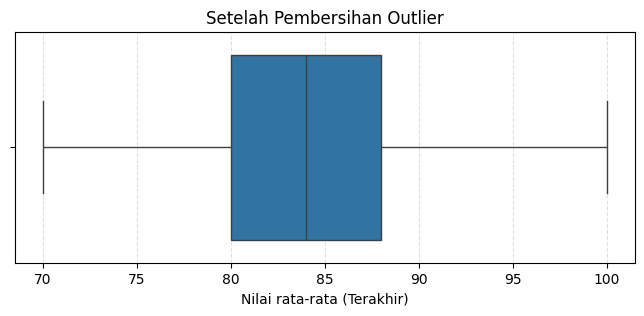

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Rata rata nilai Siswa(nilai tarakhir)']

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

plt.figure(figsize=(8, 3))
sns.boxplot(x=df["Rata rata nilai Siswa(nilai tarakhir)"])
plt.title("Setelah Pembersihan Outlier")
plt.xlabel("Nilai rata-rata (Terakhir)")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()


In [54]:
from sklearn.preprocessing import MinMaxScaler

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [55]:
import pandas as pd
import numpy as np
import unicodedata

hapus_kolom = [
    "Nama Lengkap",
    "Catatan singkat tentang Belajar",
    "Prestasi yang diraih didalam sekolah",
    "Prestasi yang diraih diluar sekolah"
]

df = df.drop(columns=hapus_kolom, errors="ignore")

def normalize_text(x):
    if pd.isna(x):
        return np.nan
    x = str(x).lower().strip()
    x = unicodedata.normalize("NFKC", x)
    x = x.replace("\xa0", " ")
    while "  " in x:
        x = x.replace("  ", " ")
    if x == "nan":
        return np.nan
    return x

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].apply(normalize_text)

def map_gaya_belajar(x):
    if pd.isna(x):
        return np.nan
    if "visual" in x:
        return "visual"
    if "auditory" in x:
        return "auditory"
    if "kinestetik" in x:
        return "kinestetik"
    return np.nan

df["Gaya belajar yang biasanya digunakan"] = (
    df["Gaya belajar yang biasanya digunakan"]
    .apply(map_gaya_belajar)
)

df = df.dropna(subset=["Gaya belajar yang biasanya digunakan"])

def map_teknik_belajar(x):
    if pd.isna(x):
        return np.nan
    if "podomoro" in x or "pomodoro" in x:
        return "podomoro"
    if "active recall" in x:
        return "active_recall"
    if "feynman" in x:
        return "feynman"
    if "latihan soal" in x:
        return "latihan_soal"
    if "spaced" in x:
        return "spaced_repetition"
    return np.nan

df["Teknik belajar yang biasanya digunakan"] = (
    df["Teknik belajar yang biasanya digunakan"]
    .apply(map_teknik_belajar)
)

df = df.dropna(subset=["Teknik belajar yang biasanya digunakan"])

mapping_waktu = {
    "< 15 menit": 1,
    "15 - 30 menit": 2,
    "30 - 60 menit": 3,
    "> 60 menit": 4
}

time_cols = [
    "Total Waktu untuk mengerjakan Pekerjaan Rumah(PR)/Hari",
    "Total Waktu untuk Belajar Mandiri /Hari"
]

for col in time_cols:
    if col in df.columns:
        df[col] = df[col].map(mapping_waktu)

def map_asal_sekolah(x):
    if pd.isna(x):
        return "lainnya"

    x = x.upper()

    if any(k in x for k in ["BINTANG TIMUR", "BTB"]):
        return "SMA_SW_BINTANG_TIMUR_BALIGE"

    if any(k in x for k in ["YAPIM"]):
        return "SMK_YAPIM_TARUNA_BALIGE"

    if any(k in x for k in ["SMKN 1 LAGUBOTI", "SMK N 1 LAGUBOTI", "SMKN1 LAGUBOTI"]):
        return "SMK_N_1_LAGUBOTI"

    if "ARJUNA" in x:
        return "SMK_ARJUNA_LAGUBOTI"

    return "lainnya"

df["Asal Sekolah"] = df["Asal Sekolah"].apply(map_asal_sekolah)

def map_lokasi_belajar(x):
    if pd.isna(x):
        return "lainnya"

    if any(k in x for k in ["rumah", "kamar", "kost", "meja"]):
        return "rumah"

    if any(k in x for k in ["sekolah", "kelas", "ruang kelas", "bengkel", "kls"]):
        return "sekolah"

    if "asrama" in x:
        return "asrama"

    if any(k in x for k in ["les", "bimbel"]):
        return "bimbel_les"

    if "perpustakaan" in x:
        return "perpustakaan"

    if any(k in x for k in ["taman", "kafe", "outdoor"]):
        return "outdoor"

    return "lainnya"

df["Lokasi Belajar"] = df["Lokasi Belajar"].apply(map_lokasi_belajar)

prestasi_cols = [
    "Jumlah prestasi di dalam sekolah *",
    "Jumlah prestasi di luar sekolah"
]

for col in prestasi_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)


one_hot_cols = [
    "Gaya belajar yang biasanya digunakan",
    "Jam Belajar",
    "Jenis Kelamin",
    "Jenis Sekolah Menengah atas yang anda tempuh",
    "Apakah kamu belajar sendiri atau dengan bantuan orang lain?",
    "Lokasi Belajar",
    "Asal Sekolah",
    "Apakah Anda pernah meraih prestasi di dalam atau luar sekolah",
    "Teknik belajar yang biasanya digunakan"
]

df = pd.get_dummies(
    df,
    columns=[c for c in one_hot_cols if c in df.columns],
    drop_first=True
)

print(df.info())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 1251
Data columns (total 32 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Timestamp                                                            888 non-null    object 
 1   Tingkat Kelas                                                        887 non-null    object 
 2   Apakah kamu belajar sendiri atau dengan bantuan orang lain?          888 non-null    object 
 3   Total Waktu untuk mengerjakan Pekerjaan Rumah(PR)/Hari               888 non-null    int64  
 4   Total Waktu untuk Belajar Mandiri /Hari                              888 non-null    int64  
 5   Mood Saat Belajar                                                    888 non-null    float64
 6   Pikiran atau Stres Akademik                                          888 non-null    float64
 7   Rata rata ni

,Timestamp,Tingkat Kelas,Apakah kamu belajar sendiri atau dengan bantuan orang lain?,Total Waktu untuk mengerjakan Pekerjaan Rumah(PR)/Hari,Total Waktu untuk Belajar Mandiri /Hari,Mood Saat Belajar,Pikiran atau Stres Akademik,Rata rata nilai Siswa(nilai tarakhir),Jumlah prestasi di dalam sekolah *,Jumlah prestasi di luar sekolah,...,Asal Sekolah_SMK_ARJUNA_LAGUBOTI,Asal Sekolah_SMK_N_1_LAGUBOTI,Asal Sekolah_SMK_YAPIM_TARUNA_BALIGE,Asal Sekolah_lainnya,Apakah Anda pernah meraih prestasi di dalam atau luar sekolah_tidak,Apakah Anda pernah meraih prestasi di dalam atau luar sekolah_ya,Teknik belajar yang biasanya digunakan_feynman,Teknik belajar yang biasanya digunakan_latihan_soal,Teknik belajar yang biasanya digunakan_podomoro,Teknik belajar yang biasanya digunakan_spaced_repetition
0,04/12/2025 13:59:33,xl,bersama teman,3,2,0.75,0.75,0.600000,0.0,tidak ada,...,False,False,False,True,True,False,False,True,False,False
1,05/12/2025 8:53:12,xll,sendiri,2,2,0.50,0.50,0.566667,0.0,> 3,...,False,False,False,True,False,True,False,False,False,True
2,05/12/2025 8:58:09,xll,sendiri,2,1,0.75,0.50,0.725000,2.0,2,...,False,False,False,True,False,True,False,True,False,False
3,05/12/2025 9:00:46,xll,sendiri,2,1,0.50,0.50,0.666667,1.0,tidak ada,...,False,False,False,True,False,True,False,True,False,False
5,05/12/2025 9:14:07,xll,sendiri,4,3,0.75,0.50,0.633333,2.0,tidak ada,...,False,False,False,True,True,False,False,True,False,False


In [56]:
print(df.columns)


Index(['Timestamp', 'Tingkat Kelas',
       'Apakah kamu belajar sendiri atau dengan bantuan orang lain? ',
       'Total Waktu untuk mengerjakan Pekerjaan Rumah(PR)/Hari',
       'Total Waktu untuk Belajar Mandiri /Hari', 'Mood Saat Belajar',
       'Pikiran atau Stres Akademik', 'Rata rata nilai Siswa(nilai tarakhir)',
       'Jumlah prestasi di dalam sekolah *',
       'Jumlah prestasi di luar sekolah ',
       'Gaya belajar yang biasanya digunakan_kinestetik',
       'Gaya belajar yang biasanya digunakan_visual', 'Jam Belajar_pagi',
       'Jam Belajar_siang', 'Jenis Kelamin_perempuan',
       'Jenis Sekolah Menengah atas yang anda tempuh_smk',
       'Lokasi Belajar_bimbel_les', 'Lokasi Belajar_lainnya',
       'Lokasi Belajar_outdoor', 'Lokasi Belajar_perpustakaan',
       'Lokasi Belajar_rumah', 'Lokasi Belajar_sekolah',
       'Asal Sekolah_SMK_ARJUNA_LAGUBOTI', 'Asal Sekolah_SMK_N_1_LAGUBOTI',
       'Asal Sekolah_SMK_YAPIM_TARUNA_BALIGE', 'Asal Sekolah_lainnya',
       'Apaka

In [57]:

# 2. Rename Kolom (Opsional tapi disarankan untuk mempermudah coding)
# Kita akan menyederhanakan nama kolom utama yang akan dianalisis
df.rename(columns={
    'Jenis Sekolah Menengah atas yang anda tempuh': 'Jenis_Sekolah',
    'Gaya belajar yang biasanya digunakan': 'Gaya_Belajar',
    'Rata rata nilai Siswa(nilai tarakhir)': 'Nilai_Rata_Rata',
    'Total Waktu untuk Belajar Mandiri /Hari': 'Waktu_Belajar_Mandiri',
    'Pikiran atau Stres Akademik': 'Stres_Akademik',
    'Jenis Kelamin': 'Jenis_Kelamin'
}, inplace=True)

print("\n--- Ringkasan Statistik Nilai Rata-Rata ---")
print(df['Nilai rata-rata (Terakhir)'].describe())


--- Ringkasan Statistik Nilai Rata-Rata ---


KeyError: 'Nilai rata-rata (Terakhir)'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Rename Kolom untuk Analisis dan Plotting (mempermudah penulisan kode)
df.rename(columns={
    'Rata - rata nilai siswa': 'Nilai_Rata_Rata',
    'Jam Belajar Siswa per Hari': 'Waktu_Belajar_Harian',
    'Gaya belajar yang biasanya digunakan': 'Gaya_Belajar',
    'Stress Akademik': 'Stres_Akademik',
    'Tingkat Kelas': 'Tingkat_Kelas',
    'Jenis Sekolah Menengah atas yang anda tempuh': 'Jenis_Sekolah',
    'Pernah meraih prestasi?': 'Pernah_Prestasi'
}, inplace=True)

print("✅ Data Bersih dan Nama Kolom Siap untuk Analisis.")

# --- Visualisasi Utama untuk Insight ---
# B. Perbandingan Nilai Rata-Rata Berdasarkan Gaya Belajar
plt.figure(figsize=(12, 7))
sns.boxplot(x='Gaya_Belajar', y='Nilai rata-rata (Terakhir)', data=df, palette='viridis')
plt.title('2. Nilai Rata-Rata Berdasarkan Gaya Belajar', fontsize=15)
plt.xlabel('Gaya Belajar', fontsize=12)
plt.ylabel('Nilai Rata-Rata', fontsize=12)
plt.show()

avg_nilai_gaya = df.groupby('Gaya_Belajar')['Nilai rata-rata (Terakhir)'].mean().sort_values(ascending=False)
print("\n--- Rata-Rata Nilai per Gaya Belajar ---")
print(avg_nilai_gaya)
print("💡 Insight B: Menentukan gaya belajar mana yang berkorelasi dengan nilai tertinggi (fokus pada median dan outliers).")


In [ ]:
# C. Dampak Stres Akademik terhadap Nilai Rata-Rata
plt.figure(figsize=(8, 6))
sns.barplot(x='Stres_Akademik', y='Nilai rata-rata (Terakhir)', data=df, palette='Blues')
plt.title('3. Dampak Stres Akademik terhadap Nilai Rata-Rata', fontsize=15)
plt.xlabel('Stres Akademik', fontsize=12)
plt.ylabel('Nilai rata-rata (Terakhir)', fontsize=12)
plt.show()

avg_nilai_stres = df.groupby('Stres_Akademik')['Nilai rata-rata (Terakhir)'].mean().sort_values(ascending=False)
print("\n--- Rata-Rata Nilai per Tingkat Stres ---")
print(avg_nilai_stres)
print("💡 Insight C: Melihat apakah tingkat stres (Tinggi/Sedang/Rendah) memengaruhi performa secara signifikan.")



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran grafik
plt.figure(figsize=(8, 6))

# Membuat boxplot untuk menunjukkan distribusi nilai rata-rata berdasarkan tingkat Stres Akademik
sns.boxplot(x='Stres_Akademik', y='Nilai rata-rata (Terakhir)', data=df, palette='Blues')

# Menambahkan judul dan label sumbu
plt.title('3. Dampak Stres Akademik terhadap Nilai Rata-Rata', fontsize=15)
plt.xlabel('Stres Akademik', fontsize=12)
plt.ylabel('Nilai rata-rata (Terakhir)', fontsize=12)

# Menampilkan grafik
plt.show()


In [ ]:
# Mengatur ukuran grafik
plt.figure(figsize=(8, 6))

# Membuat boxplot
sns.boxplot(x='Mood Saat Belajar', y='Rata rata nilai Siswa(nilai tarakhir)', data=df, palette='coolwarm')

# Menambahkan judul dan label
plt.title('Pengaruh Mood terhadap Nilai Akademik', fontsize=15)
plt.xlabel('Mood saat belajar', fontsize=12)
plt.ylabel('Nilai rata-rata (Terakhir)', fontsize=12)

# Menampilkan grafik
plt.show()


In [ ]:
# D. Korelasi Waktu Belajar Harian vs. Nilai Rata-Rata
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Waktu_Belajar_Harian', y='Rata rata nilai Siswa(nilai tarakhir)', data=df, alpha=0.6, color='darkorange')
plt.title('4. Korelasi Waktu Belajar Harian vs. Nilai Rata-Rata', fontsize=15)
plt.xlabel('Waktu Belajar Harian (Jam)', fontsize=12)
plt.ylabel('Nilai rata-rata (Terakhir)', fontsize=12)
plt.show()

korelasi = df['Waktu_Belajar_Harian'].corr(df['Nilai rata-rata (Terakhir)'])
print(f"\n--- Koefisien Korelasi Waktu Belajar Harian vs. Nilai: {korelasi:.3f} ---")
print("💡 Insight D: Mengukur kekuatan hubungan antara kuantitas waktu belajar dengan hasil akademik.")